<a href="https://colab.research.google.com/github/daiviknambiar/Income-Prediction-Model/blob/main/Income_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sms
import numpy as np
import sklearn as sk

In [64]:
##Load df
df = pd.read_csv("income.csv")

In [65]:
#One hot enconding
df = pd.concat([df.drop('occupation', axis=1),
                pd.get_dummies(df['occupation']).add_prefix('occupation_')], axis=1)

df = pd.concat([df.drop('workclass', axis=1),
                pd.get_dummies(df['workclass']).add_prefix('workclass_')], axis=1)

df = df.drop('education', axis=1)

df = pd.concat([df.drop('marital-status', axis=1),
                pd.get_dummies(df['marital-status']).add_prefix('marital-status_')], axis=1)

df = pd.concat([df.drop('relationship', axis=1),
                pd.get_dummies(df['relationship']).add_prefix('relationship_')], axis=1)

df = pd.concat([df.drop('race', axis=1),
                pd.get_dummies(df['race']).add_prefix('race_')], axis=1)

df = pd.concat([df.drop('native-country', axis=1),
                pd.get_dummies(df['native-country']).add_prefix('native-country_')], axis=1)


In [66]:
#Enconding for Income and Gender
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Male' else 0)
df['income'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

<Axes: >

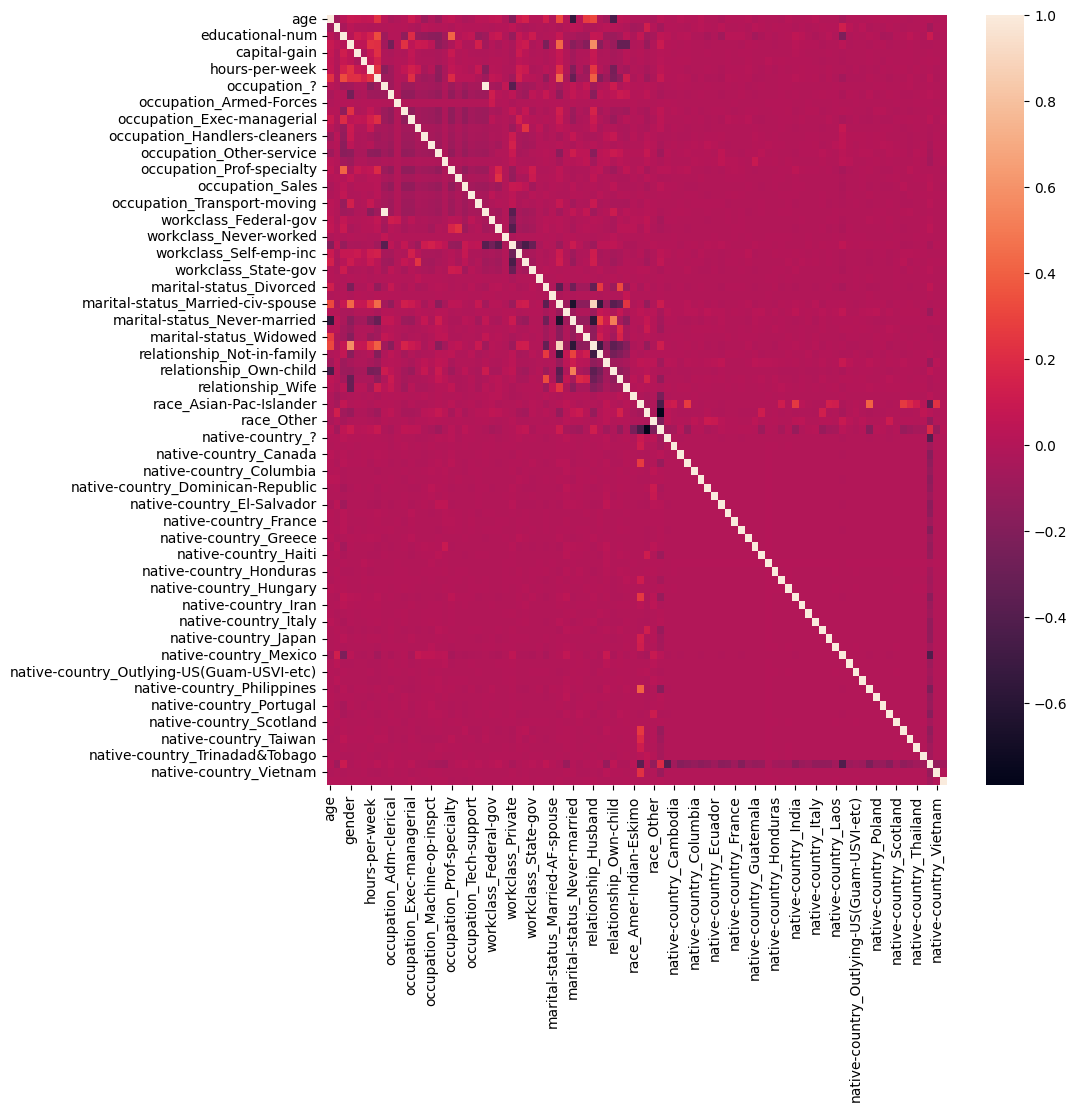

In [67]:
plt.figure(figsize=(10,10))
sms.heatmap(df.corr(), annot=False)

In [68]:
#Higher correlations to income
correlations = df.corr()['income'].abs()
sorted_correlations = correlations.sort_values()
num_cols_to_drop = int(0.8 * len(df.columns))
cols_to_drop = sorted_correlations.iloc[:num_cols_to_drop].index
df_dropped = df.drop(cols_to_drop, axis=1)

<Axes: >

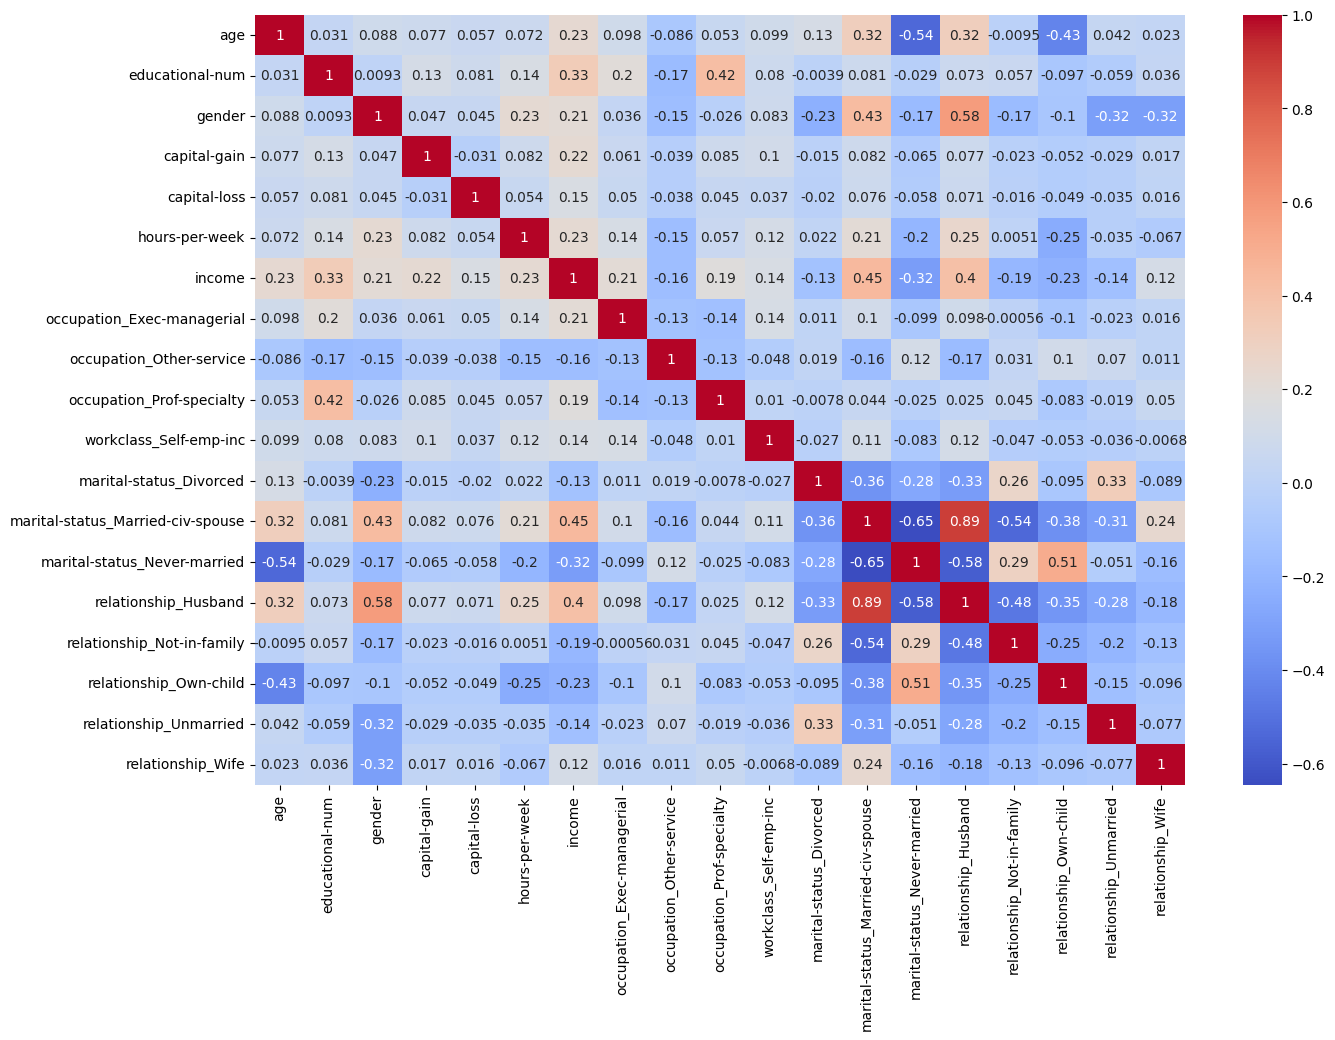

In [69]:
plt.figure(figsize=(15,10))
sms.heatmap(df_dropped.corr(), annot=True, cmap='coolwarm')

In [70]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

df = df.drop('fnlwgt', axis=1)

train_df, test_df = train_test_split(df, test_size=0.2)

In [71]:
X_train = train_df.drop('income', axis=1)
y_train = train_df['income']
X_test = test_df.drop('income', axis=1)
y_test = test_df['income']

In [72]:
forest = RandomForestClassifier()

forest.fit(X_train, y_train)

RandomForestClassifier()

In [73]:
forest.score(X_test, y_test)

0.8506500153546934